In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


https://www.kaggle.com/varun2145/pima-data-visualisation-and-machine-learning<br>
https://www.arunprakash.org/2017/03/data-visualisation-and-machine-learning.html

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


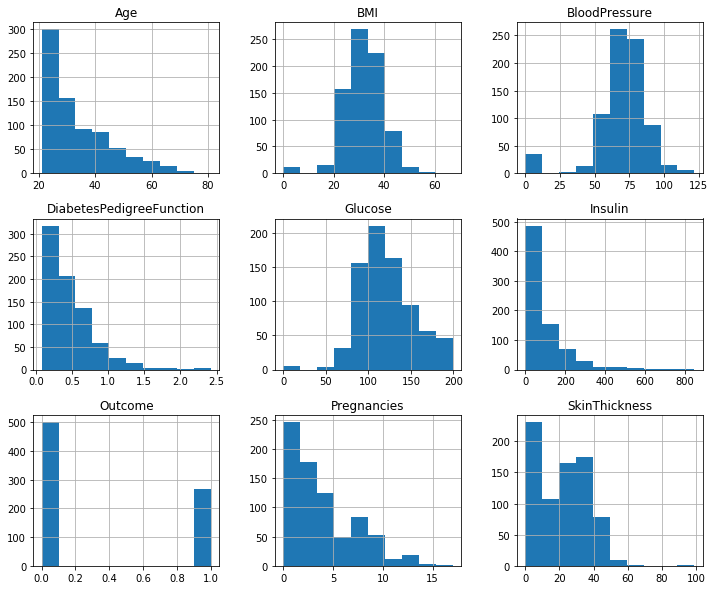

In [6]:
_ = df.hist(figsize=(12, 10))

In [0]:
import seaborn as sns # for checking co-relation

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


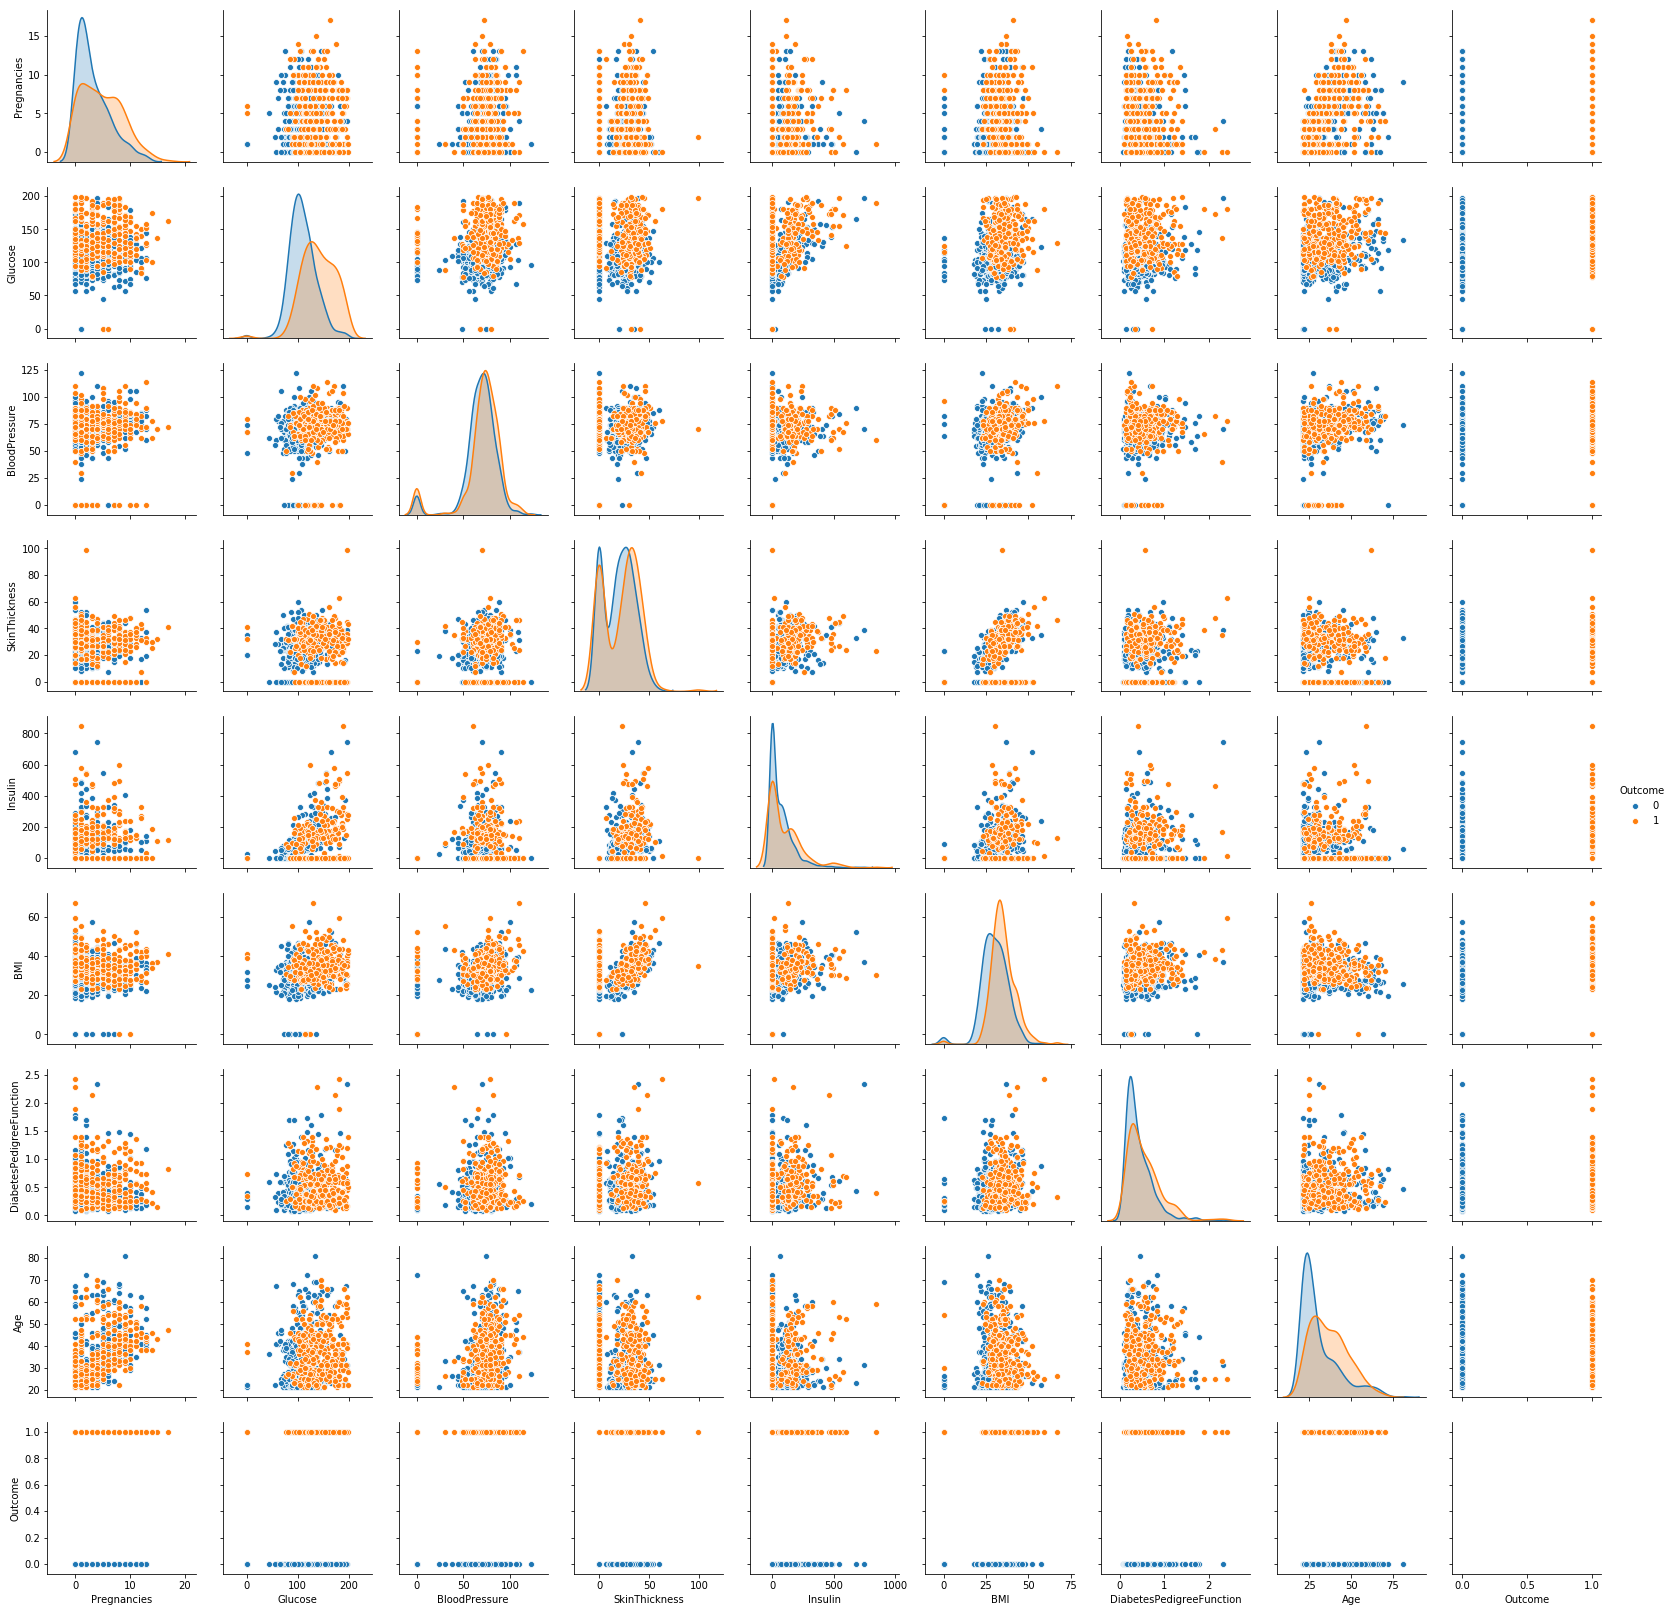

In [9]:
sns.pairplot(df, hue='Outcome')

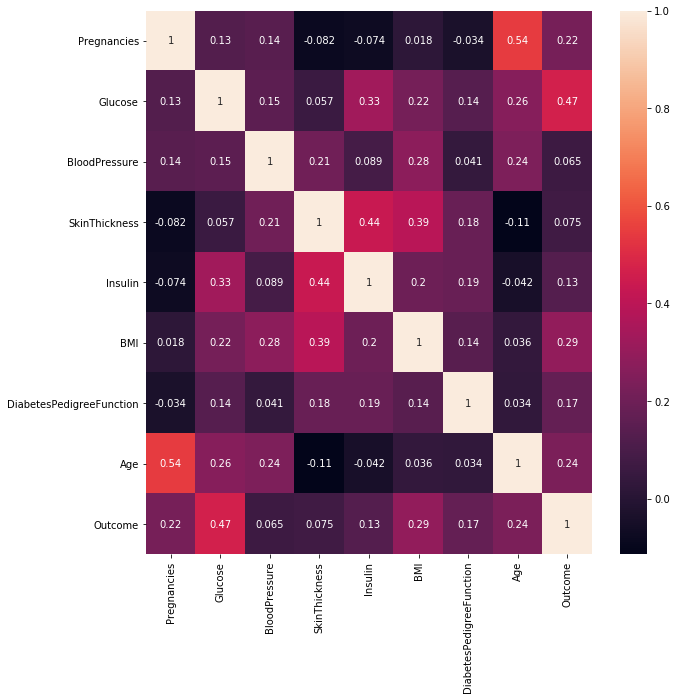

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True) # find the co-relation between features

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2> Rescale all of them with StandardScaler

* It take the mean of a column subtract the mean with all the value of column and divide the result with std.

(mean-all_value_of_col) / std

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
from keras.utils import to_categorical

In [0]:
sc = StandardScaler()
x = sc.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values
y_cat = to_categorical(y)

In [20]:
x.shape

(768, 8)

In [21]:
y_cat.shape

(768, 2)

<h2>ANN of diabetes

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, random_state=22, test_size=0.2)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [0]:
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(Adam(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train, y_train, epochs=20, verbose=2, validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 552 samples, validate on 62 samples
Epoch 1/20





 - 1s - loss: 0.6457 - acc: 0.6812 - val_loss: 0.6141 - val_acc: 0.7419
Epoch 2/20
 - 0s - loss: 0.4665 - acc: 0.7826 - val_loss: 0.5258 - val_acc: 0.7419
Epoch 3/20
 - 0s - loss: 0.4788 - acc: 0.7591 - val_loss: 0.5844 - val_acc: 0.7581
Epoch 4/20
 - 0s - loss: 0.4529 - acc: 0.7899 - val_loss: 0.6906 - val_acc: 0.7742
Epoch 5/20
 - 0s - loss: 0.4720 - acc: 0.8062 - val_loss: 0.4959 - val_acc: 0.7742
Epoch 6/20
 - 0s - loss: 0.4760 - acc: 0.8007 - val_loss: 0.5600 - val_acc: 0.7581
Epoch 7/20
 - 0s - loss: 0.4432 - acc: 0.7935 - val_loss: 0.5449 - val_acc: 0.7903
Epoch 8/20
 - 0s - loss: 0.4279 - acc: 0.8025 - val_loss: 0.5562 - val_acc: 0.7742
Epoch 9/20
 - 0s - loss: 0.4266 - acc: 0.7935 - val_loss: 0.5905 - val_acc: 0.7903
Epoch 10/20
 - 0s - loss: 0.4267 - acc: 0.7953 - val_loss: 0.5417 - val_acc: 0.7903
Epoch 11/20
 - 0s - lo

<h2> Model accuracy

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
accuracy_score(y_test_class, y_pred_class)

0.6818181818181818

In [37]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       100
           1       0.57      0.39      0.46        54

    accuracy                           0.68       154
   macro avg       0.64      0.61      0.62       154
weighted avg       0.67      0.68      0.66       154



In [38]:
confusion_matrix(y_test_class, y_pred_class)

array([[84, 16],
       [33, 21]])

In [40]:
pd.Series(y_test_class).value_counts() / len(y_test_class)

0    0.649351
1    0.350649
dtype: float64

<h2>Benchmarking with 3 classifier or comparing



In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [43]:
for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
  mod.fit(x_train, y_train[:, 1])
  y_pred = mod.predict(x_test)
  print("="*80)
  print(mod)
  print("-"*80)
  print("Accuracy score :\t{:0.3}".format(accuracy_score(y_test_class, y_pred)))
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test_class, y_pred),"\n")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Accuracy score :	0.708
Confusion Matrix : 
[[86 14]
 [31 23]] 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Accuracy score :	0.721
Confusion Matrix : 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
